In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import pingouin as pg

In [3]:
df = pd.read_csv("dades/points_data.csv")
df["fire"] = df["fire"].map({1:"foc", 0:"no_foc"})

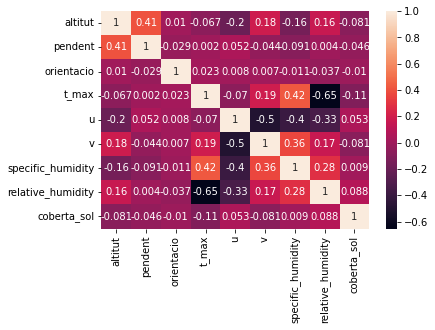

In [4]:
# Correlacions
corr_matrix = df.corr().round(3)
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [5]:
#Crea un diccionari amb les unitats
unitats_diccionari = {"altitut": "m",
                    "pendent": "%",
                    "orientacio": "graus",
                    "t_max": "Kelvin",
                    "u": "m/s",
                    "v": "m/s",
                    "specific_humidity": "kg water/kg dry air",
                    "relative_humidity": "%"}




Analisis de la variable altitut


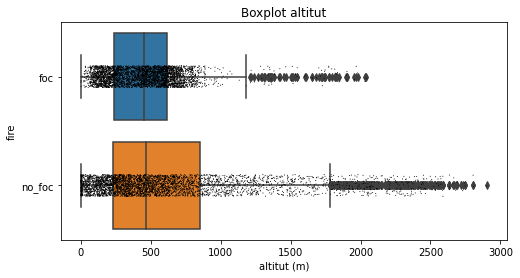

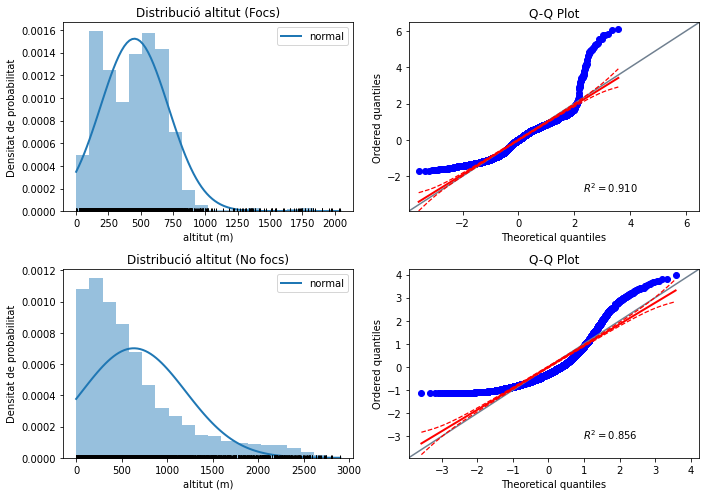


 Test d'homocedasticitat
El p valor és: 4.427947165610699e-161
Es troben evidències significatives, per alpha=0.05 de que les variances son diferents entre les dos poblacions. S'aplicarà la correcció de Welsh en el T-test

 T-test sobre la mitjana
El p valor és: 5.198735480147587e-74
Es rebutja la hipotesis nul·la. Tenim evidència suficient de que la mitjana de la variable altitut és diferent en els focs que en els no focs, per un alpha=0.05.


Analisis de la variable pendent


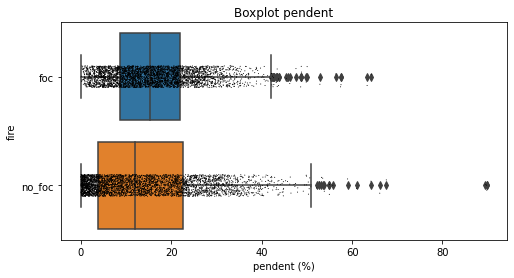

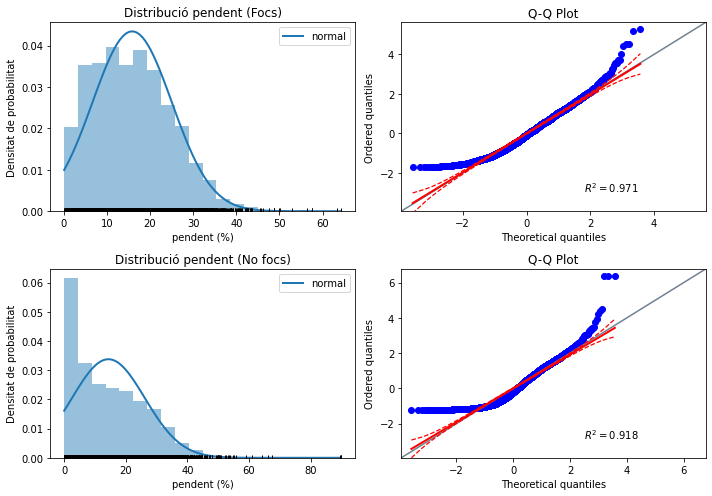


 Test d'homocedasticitat
El p valor és: 6.809215220237155e-55
Es troben evidències significatives, per alpha=0.05 de que les variances son diferents entre les dos poblacions. S'aplicarà la correcció de Welsh en el T-test

 T-test sobre la mitjana
El p valor és: 3.522315712595807e-10
Es rebutja la hipotesis nul·la. Tenim evidència suficient de que la mitjana de la variable pendent és diferent en els focs que en els no focs, per un alpha=0.05.


Analisis de la variable orientacio


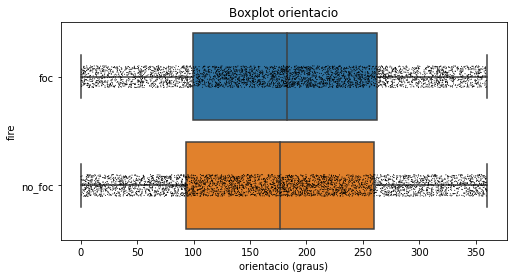

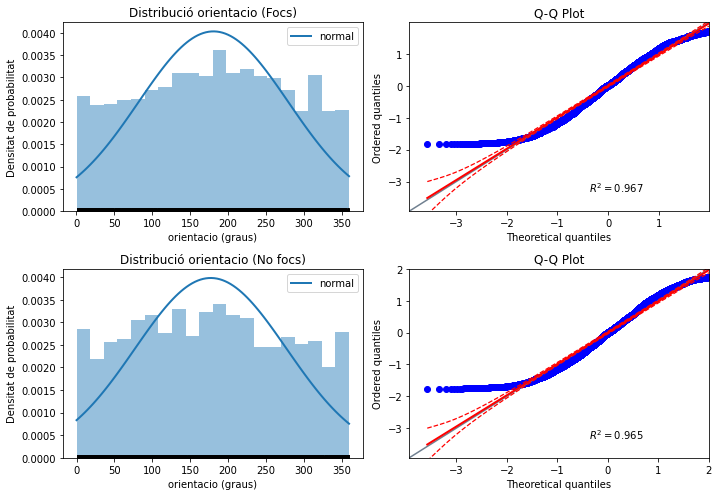


 Test d'homocedasticitat
El p valor és: 0.23276330603408296
No es troben evidències significatives, per alpha=0.05 de que les variances siguin diferents entre les dos poblacions

 T-test sobre la mitjana
El p valor és: 0.11103465102288694
No es pot rebutjar la hipotesis nul·la. No tenim evidència suficient de que la mitjana de la variable orientacio és diferent en els focs que en els no focs, per un alpha=0.05.


Analisis de la variable t_max


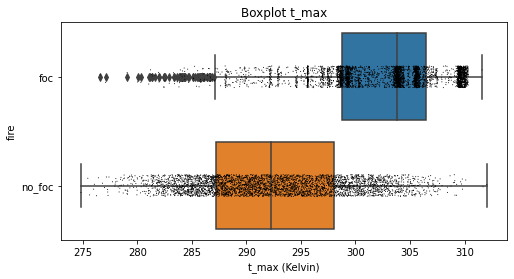

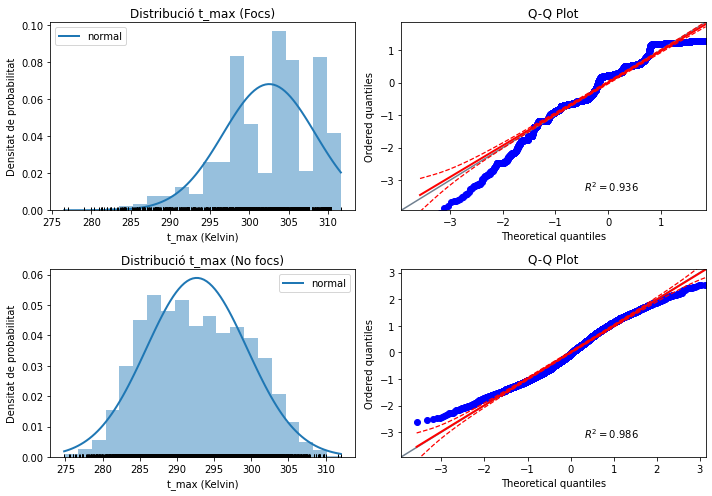


 Test d'homocedasticitat
El p valor és: 2.0662602134456444e-36
Es troben evidències significatives, per alpha=0.05 de que les variances son diferents entre les dos poblacions. S'aplicarà la correcció de Welsh en el T-test

 T-test sobre la mitjana
El p valor és: 0.0
Es rebutja la hipotesis nul·la. Tenim evidència suficient de que la mitjana de la variable t_max és diferent en els focs que en els no focs, per un alpha=0.05.


Analisis de la variable u


c:\Users\38857752b\AppData\Local\Programs\Python\Python39\lib\site-packages\pingouin\bayesian.py:152: RuntimeWarning: divide by zero encountered in double_scalars
  bf10 = 1 / ((1 + t**2 / df) ** (-(df + 1) / 2) / integr)


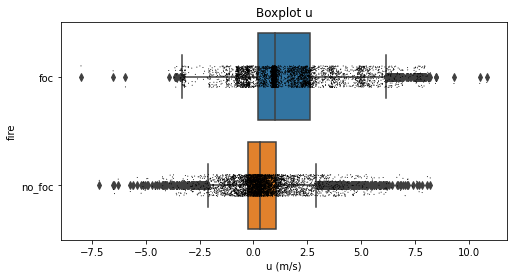

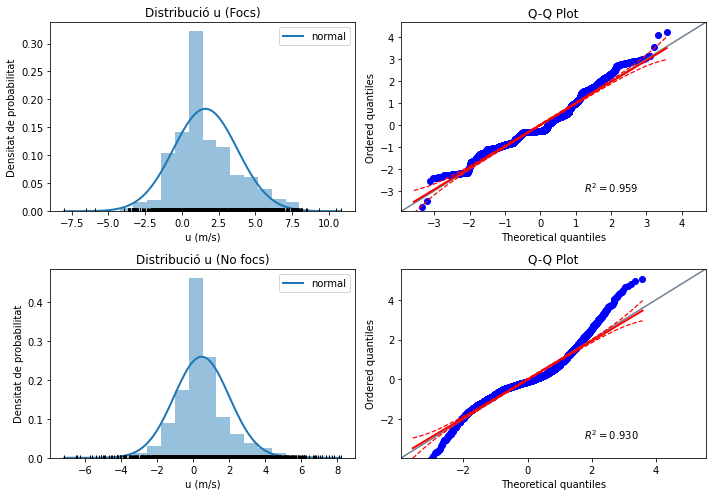


 Test d'homocedasticitat
El p valor és: 8.500995193154883e-75
Es troben evidències significatives, per alpha=0.05 de que les variances son diferents entre les dos poblacions. S'aplicarà la correcció de Welsh en el T-test

 T-test sobre la mitjana
El p valor és: 1.7554812677477452e-148
Es rebutja la hipotesis nul·la. Tenim evidència suficient de que la mitjana de la variable u és diferent en els focs que en els no focs, per un alpha=0.05.


Analisis de la variable v


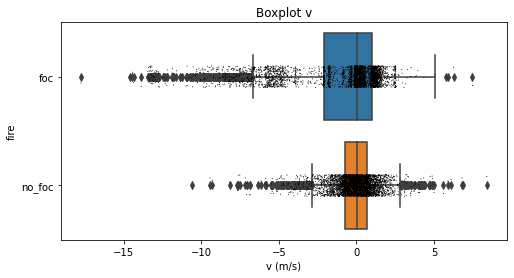

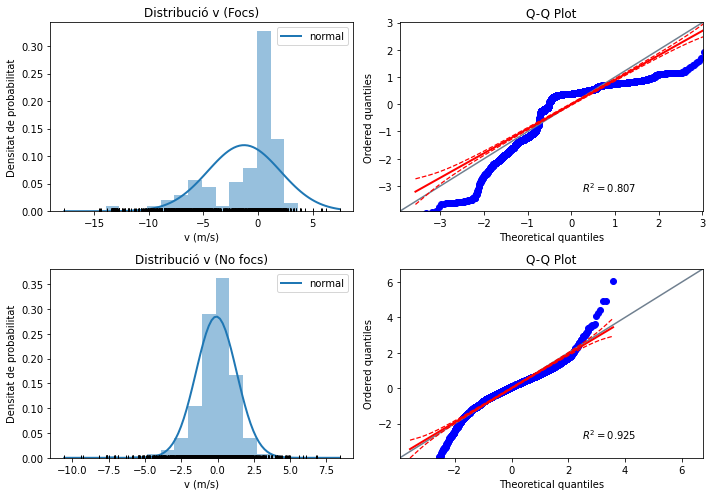


 Test d'homocedasticitat
El p valor és: 4.634369176368117e-140
Es troben evidències significatives, per alpha=0.05 de que les variances son diferents entre les dos poblacions. S'aplicarà la correcció de Welsh en el T-test

 T-test sobre la mitjana
El p valor és: 1.4874015600376188e-89
Es rebutja la hipotesis nul·la. Tenim evidència suficient de que la mitjana de la variable v és diferent en els focs que en els no focs, per un alpha=0.05.


Analisis de la variable specific_humidity


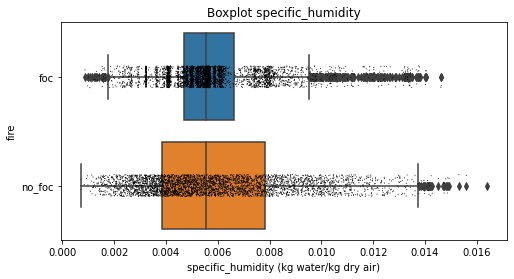

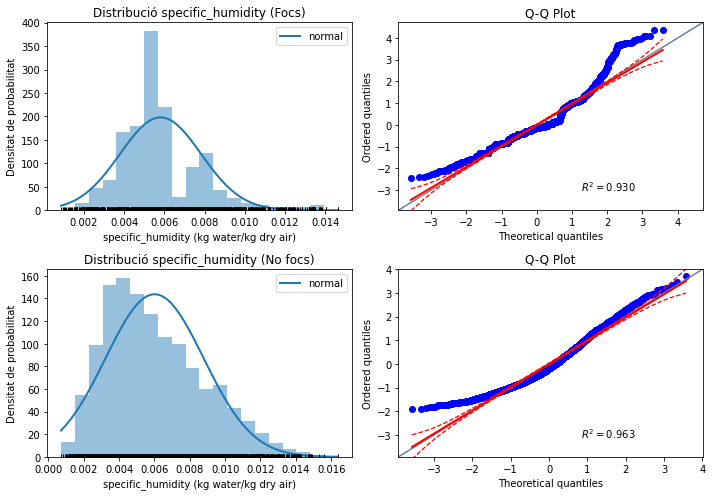


 Test d'homocedasticitat
El p valor és: 1.5933154878992947e-113
Es troben evidències significatives, per alpha=0.05 de que les variances son diferents entre les dos poblacions. S'aplicarà la correcció de Welsh en el T-test

 T-test sobre la mitjana
El p valor és: 0.00029139136944559044
Es rebutja la hipotesis nul·la. Tenim evidència suficient de que la mitjana de la variable specific_humidity és diferent en els focs que en els no focs, per un alpha=0.05.


Analisis de la variable relative_humidity


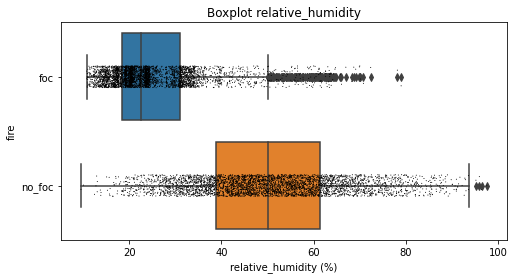

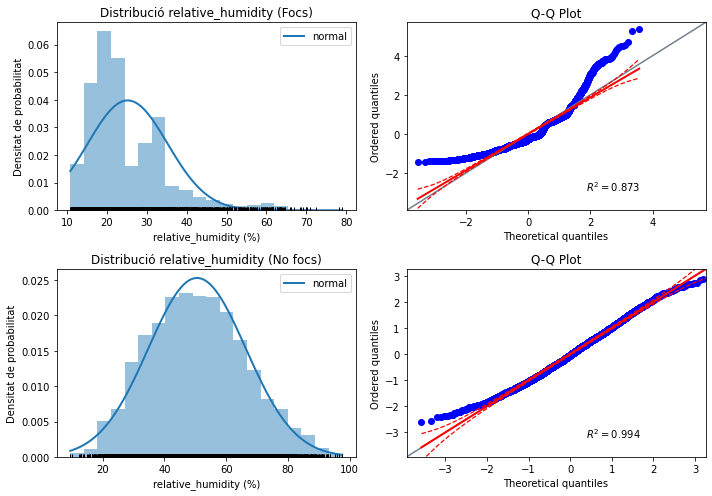


 Test d'homocedasticitat
El p valor és: 9.388595436850173e-190
Es troben evidències significatives, per alpha=0.05 de que les variances son diferents entre les dos poblacions. S'aplicarà la correcció de Welsh en el T-test

 T-test sobre la mitjana
El p valor és: 0.0
Es rebutja la hipotesis nul·la. Tenim evidència suficient de que la mitjana de la variable relative_humidity és diferent en els focs que en els no focs, per un alpha=0.05.


c:\Users\38857752b\AppData\Local\Programs\Python\Python39\lib\site-packages\pingouin\bayesian.py:152: RuntimeWarning: divide by zero encountered in double_scalars
  bf10 = 1 / ((1 + t**2 / df) ** (-(df + 1) / 2) / integr)


In [6]:
# Analisi variables quantitatives
alpha = 0.05
for i, x in unitats_diccionari.items():
    print(f"\n\nAnalisis de la variable {i}")    
    # Boxplot
    fig, ax = plt.subplots(1, 1, figsize=(8, 4))
    sns.boxplot(y="fire", x=i, data=df)
    sns.stripplot(y="fire", x=i, data=df, color='black', alpha = 1, size=1, ax=ax);
    ax.set_title(f'Boxplot {i}')
    ax.set_xlabel(f'{i} ({x})')
    plt.show()
    
    # T-test
    # Gráfics de distribució
    fig, axs = plt.subplots(2, 2, figsize=(10, 7))

    values_fire = df.loc[df.fire== "foc", i]
    # Valors de la mitjana (mu) i desviació típica (sigma) de cada grup
    mu, sigma = stats.norm.fit(values_fire)

    # Valors teórics de la normal en el rang observat
    x_hat = np.linspace(min(values_fire), max(values_fire), num=100)
    y_hat = stats.norm.pdf(x_hat, mu, sigma)

    # Gráfic distribució
    axs[0, 0].plot(x_hat, y_hat, linewidth=2, label='normal')
    axs[0, 0].hist(x=values_fire, density=True, bins=20, color="#3182bd", alpha=0.5)
    axs[0, 0].plot(values_fire, np.full_like(values_fire, 0), '|k', markeredgewidth=1)
    axs[0, 0].set_title(f'Distribució {i} (Focs)')
    axs[0, 0].set_xlabel(f'{i} ({x})')
    axs[0, 0].set_ylabel('Densitat de probabilitat')
    axs[0, 0].legend()

    # Gráfic distribució qq-plot
    pg.qqplot(values_fire, dist='norm', ax=axs[0, 1])

    values_nofire = df.loc[df.fire== "no_foc", i]
    mu, sigma = stats.norm.fit(values_nofire)
    x_hat = np.linspace(min(values_nofire), max(values_nofire), num=100)
    y_hat = stats.norm.pdf(x_hat, mu, sigma)
    axs[1, 0].plot(x_hat, y_hat, linewidth=2, label='normal')
    axs[1, 0].hist(x=values_nofire, density=True, bins=20, color="#3182bd", alpha=0.5)
    axs[1, 0].plot(values_nofire, np.full_like(values_nofire, 0), '|k', markeredgewidth=1)
    axs[1, 0].set_title(f'Distribució {i} (No focs)')
    axs[1, 0].set_xlabel(f'{i} ({x})')
    axs[1, 0].set_ylabel('Densitat de probabilitat')
    axs[1, 0].legend()

    pg.qqplot(values_nofire, dist='norm', ax=axs[1, 1])
    plt.tight_layout();
    plt.show()
    
    # Test de homocedasticitat
    print("\n Test d'homocedasticitat")
    W, p_value, equal_var = pg.homoscedasticity(data=df, dv=i, group='fire').iloc[0]
    print("El p valor és:", p_value)
    if equal_var:
        print(f"No es troben evidències significatives, per alpha={alpha} de que les variances siguin diferents entre les dos poblacions")
        correction=False
    else:
        print(f"Es troben evidències significatives, per alpha={alpha} de que les variances son diferents entre les dos poblacions. S'aplicarà la correcció de Welsh en el T-test")
        correction='auto'

    # T-test
    print("\n T-test sobre la mitjana")
    T, dof, alternative, p_value, CI95, cohen, BF10, power = pg.ttest(x=values_fire, y=values_nofire, alternative='two-sided', correction=correction).iloc[0] 
    print("El p valor és:", p_value)
    conclusion = f"No es pot rebutjar la hipotesis nul·la. No tenim evidència suficient de que la mitjana de la variable {i} és diferent en els focs que en els no focs, per un alpha={alpha}."
    if p_value <= alpha:
        conclusion = f"Es rebutja la hipotesis nul·la. Tenim evidència suficient de que la mitjana de la variable {i} és diferent en els focs que en els no focs, per un alpha={alpha}."
    print(conclusion)

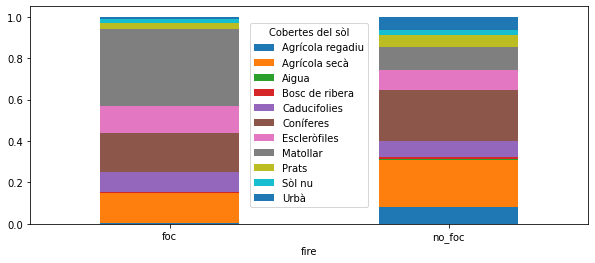

El valor de khi quadrat és 1178.5467749360305  i el p valor és: 0.0
Es rebutja la hipotesis nul·la. Tenim evidència suficient que hi ha associació entre foc i la coberta del sòl.


In [7]:
# Analisi variable categòrica
classes = {1: "Agrícola secà", 2:"Coníferes", 3:"Caducifolies", 4:"Escleròfiles", 5:"Matollar", 6:"Prats", 7:"Bosc de ribera", 8:"Sòl nu", 9:"Aigua", 10: "Urbà", 11:"Agrícola regadiu"}
df["coberta_sol"] = df["coberta_sol"].map(classes)
crosstb = pd.crosstab(df["fire"], df["coberta_sol"], normalize='index')
crosstb.plot(kind="bar", width=1/2, stacked=True, figsize=(10,4), rot=0).legend(title="Cobertes del sòl", loc='center')
plt.show()
#Test de Khi quadrat
alpha = 0.05
crosstb = pd.crosstab(df["fire"], df["coberta_sol"], margins= True, margins_name="All")
chi_square = 0
rows = df['fire'].unique()
columns = df['coberta_sol'].unique()
for i in columns:
    for j in rows:
        O = crosstb[i][j]
        E = crosstb[i]['All'] * crosstb['All'][j] / crosstb['All']['All']
        chi_square += (O-E)**2/E

p_value = 1 - stats.chi2.cdf(chi_square, (len(rows)-1)*(len(columns)-1))
conclusion = "No es pot rebutjar la hipotesis nul·la. No tenim evidència suficient que hi hagi associació entre foc i la coberta del sòl."
if p_value <= alpha:
    conclusion = "Es rebutja la hipotesis nul·la. Tenim evidència suficient que hi ha associació entre foc i la coberta del sòl."
        
print("El valor de khi quadrat és", chi_square, " i el p valor és:", p_value)
print(conclusion)
